# Histograms

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
%matplotlib inline

In [17]:
openfile = pd.read_csv('/Users/ballanr/Desktop/peakstocompare.csv')
zeros = pd.read_csv('/Users/ballanr/Desktop/peakstocompare0.csv')
ones = pd.read_csv('/Users/ballanr/Desktop/peakstocompare1.csv')

In [18]:
kevinsmethod = openfile['Confidence1']
kevinsmethod0 = zeros['Confidence1']
kevinsmethod1 = ones['Confidence1']
ebbets = openfile['Confidence2']
ebbets0 = zeros['Confidence2']
ebbets1 = ones['Confidence2']
Area = openfile['Area Ratios']
Area0 = zeros['Area Ratios']
Area1 = ones['Area Ratios']

In [19]:
km = []
a = []
area1 = []
for i in range(len(kevinsmethod)):
    if kevinsmethod[i] > 0 and kevinsmethod[i] < 15:
        km.append(kevinsmethod[i])
km = np.asarray(km)
for k in range(len(Area)):
    if Area[k] < 10:
        a.append(Area[k])
for j in range(len(Area1)):
    if Area1[j] < 10:
        area1.append(Area1[j])

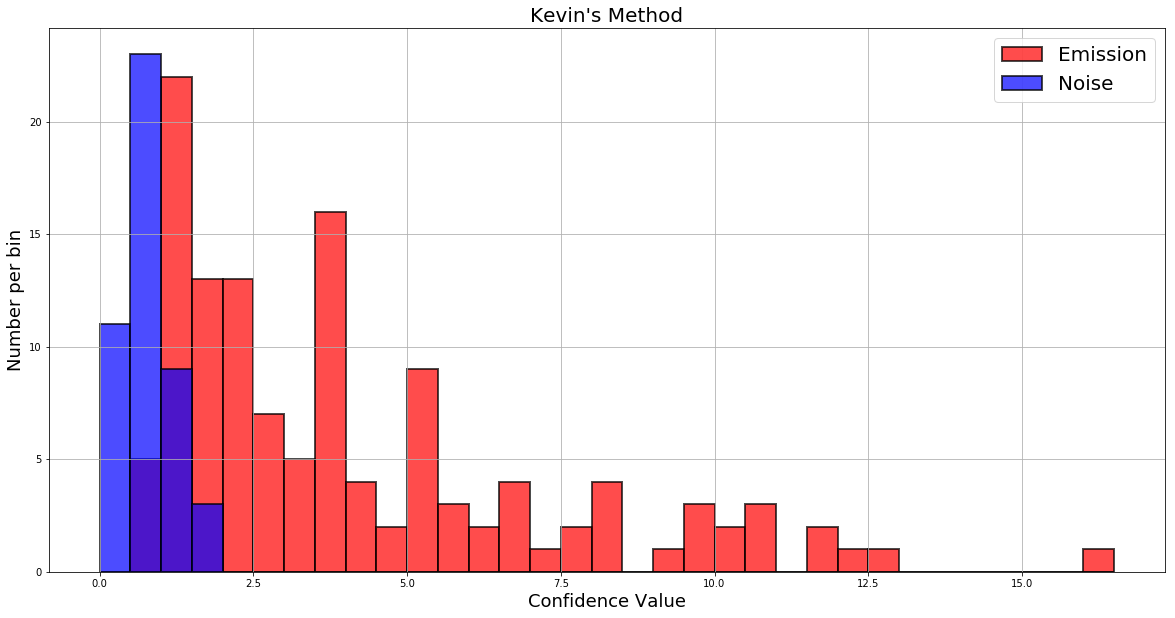

In [130]:
plt.figure(figsize=(20,10));
binwidth = np.arange(0,17,0.5)
plt.hist(kevinsmethod1,bins=binwidth,color='red',alpha=0.7,edgecolor='black',linewidth=2,label='Emission');
plt.hist(kevinsmethod0,bins=binwidth,color='blue',alpha=0.7,edgecolor='black',linewidth=2,label='Noise');
plt.legend(loc='upper right',fontsize=20);
plt.grid(True);
plt.ylabel('Number per bin',fontsize=18);
plt.xlabel('Confidence Value',fontsize=18);
plt.title('Kevin\'s Method',fontsize=20);

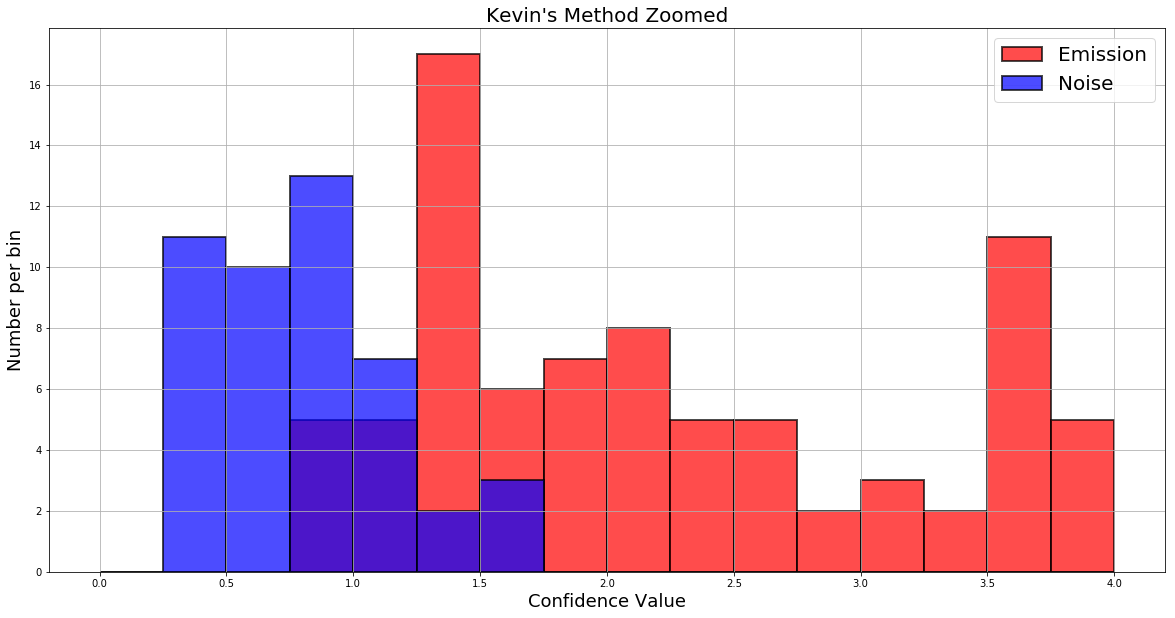

In [132]:
plt.figure(figsize=(20,10));
binwidth = np.arange(0,4.25,0.25)
plt.hist(kevinsmethod1,bins=binwidth,color='red',alpha=0.7,edgecolor='black',linewidth=2,label='Emission');
plt.hist(kevinsmethod0,bins=binwidth,color='blue',alpha=0.7,edgecolor='black',linewidth=2,label='Noise');
plt.legend(loc='upper right',fontsize=20);
plt.grid(True);
plt.ylabel('Number per bin',fontsize=18);
plt.xlabel('Confidence Value',fontsize=18);
plt.title('Kevin\'s Method Zoomed',fontsize=20);

Here there seems to be a good cutoff between 1.25 and 1.75.

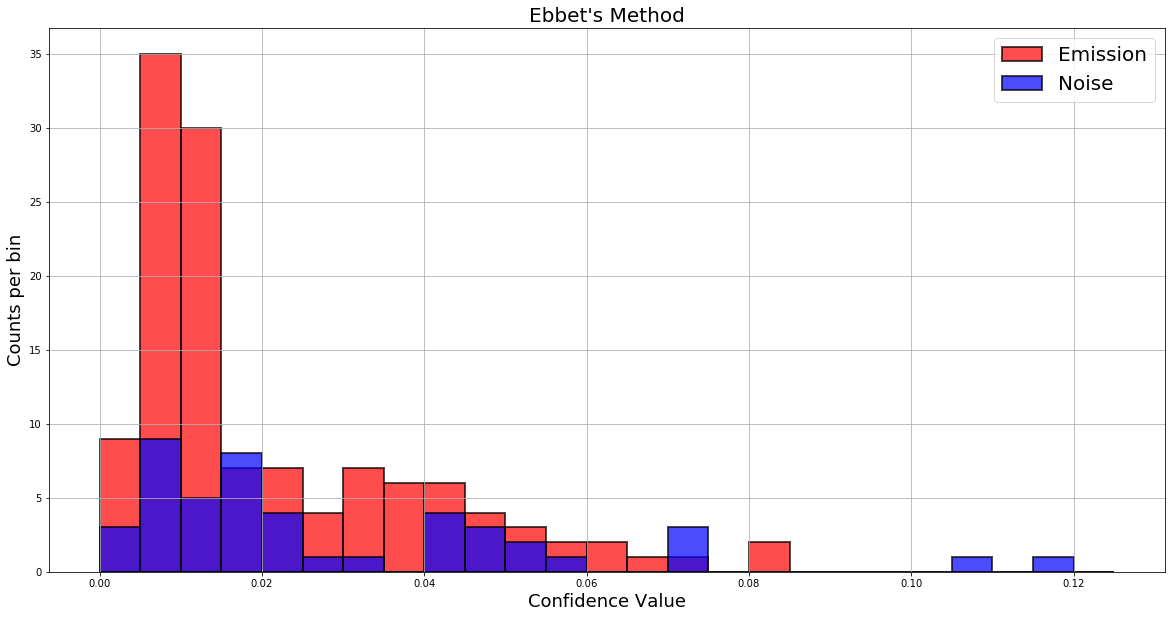

In [136]:
plt.figure(figsize=(20,10));
#ebbets.hist(bins=50,edgecolor='black',color='black',alpha=0.5,label='All');
binwidth1 = np.arange(0,0.13,0.005)
ebbets1.hist(bins=binwidth1,color='red',alpha=0.7,edgecolor='black',linewidth=2,label='Emission');
ebbets0.hist(bins=binwidth1,color='blue',alpha=0.7,edgecolor='black',linewidth=2,label='Noise');
plt.legend(loc='upper right',fontsize=20);
plt.title('Ebbet\'s Method',fontsize=20);
plt.ylabel('Counts per bin',fontsize=18);
plt.xlabel('Confidence Value',fontsize=18);
plt.grid(True);

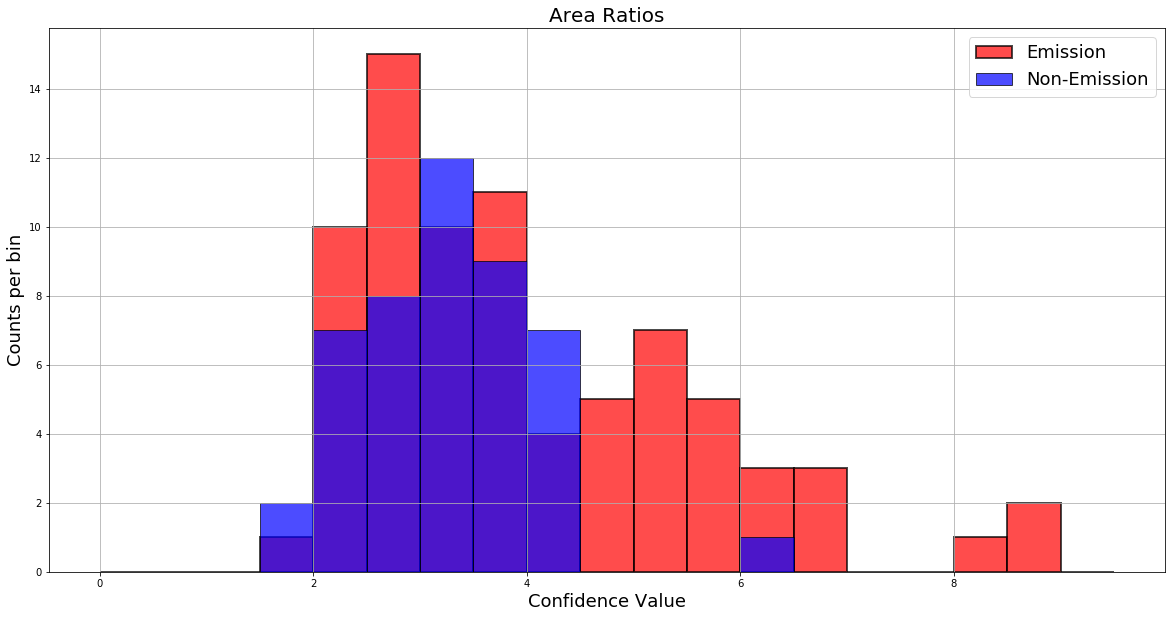

In [146]:
plt.figure(figsize=(20,10));
#plt.hist(a,bins=50,color='black',alpha=0.5,edgecolor='black',label='All');
binwidth3 = np.arange(0,10,0.5)
plt.hist(area1,bins=binwidth3,color='red',alpha=0.7,label='Emission',edgecolor='black',linewidth=2);
plt.hist(Area0,bins=binwidth3,color='blue',alpha=0.7,label='Non-Emission',edgecolor='black');
plt.legend(loc='upper right',fontsize=18);
plt.ylabel('Counts per bin',fontsize=18);
plt.xlabel('Confidence Value',fontsize=18);
plt.title('Area Ratios',fontsize=20);
plt.grid(True);

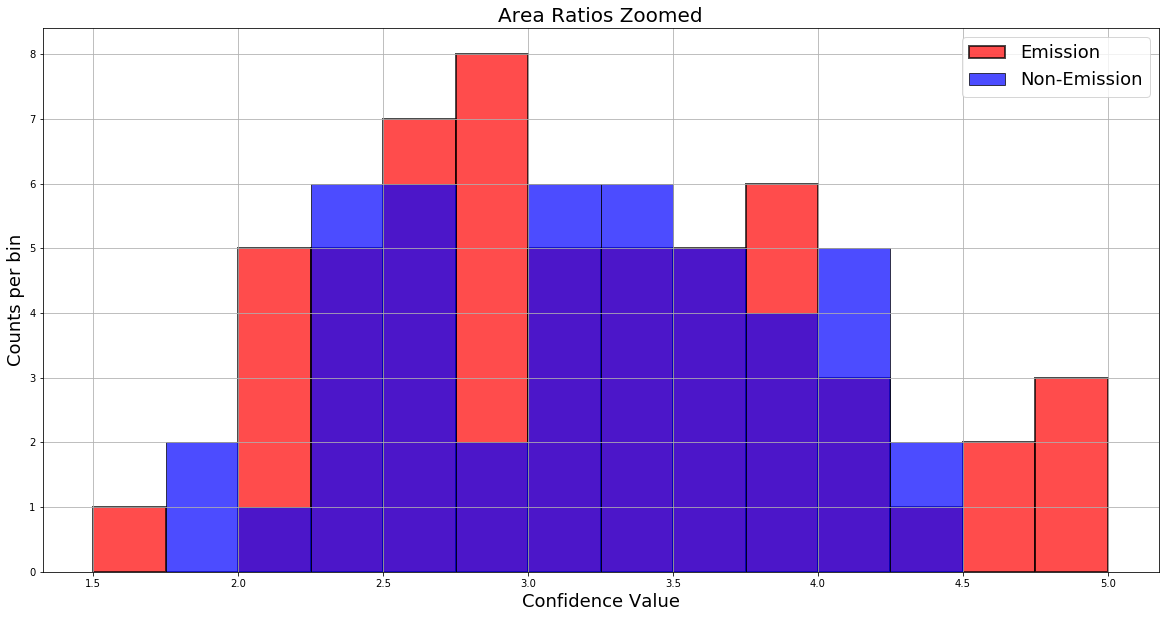

In [145]:
plt.figure(figsize=(20,10));
#plt.hist(a,bins=50,color='black',alpha=0.5,edgecolor='black',label='All');
binwidth3 = np.arange(1.5,5.25,0.25)
plt.hist(area1,bins=binwidth3,color='red',alpha=0.7,label='Emission',edgecolor='black',linewidth=2);
plt.hist(Area0,bins=binwidth3,color='blue',alpha=0.7,label='Non-Emission',edgecolor='black');
plt.legend(loc='upper right',fontsize=18);
plt.ylabel('Counts per bin',fontsize=18);
plt.xlabel('Confidence Value',fontsize=18);
plt.title('Area Ratios Zoomed',fontsize=20);
plt.grid(True);

It seems that around 5 seems to be a good cutoff point for this method. Anything under 4.5 is mixed pretty well between emission and non-emission spectra.

## Plotting Area Ratios vs. Kevin's Method

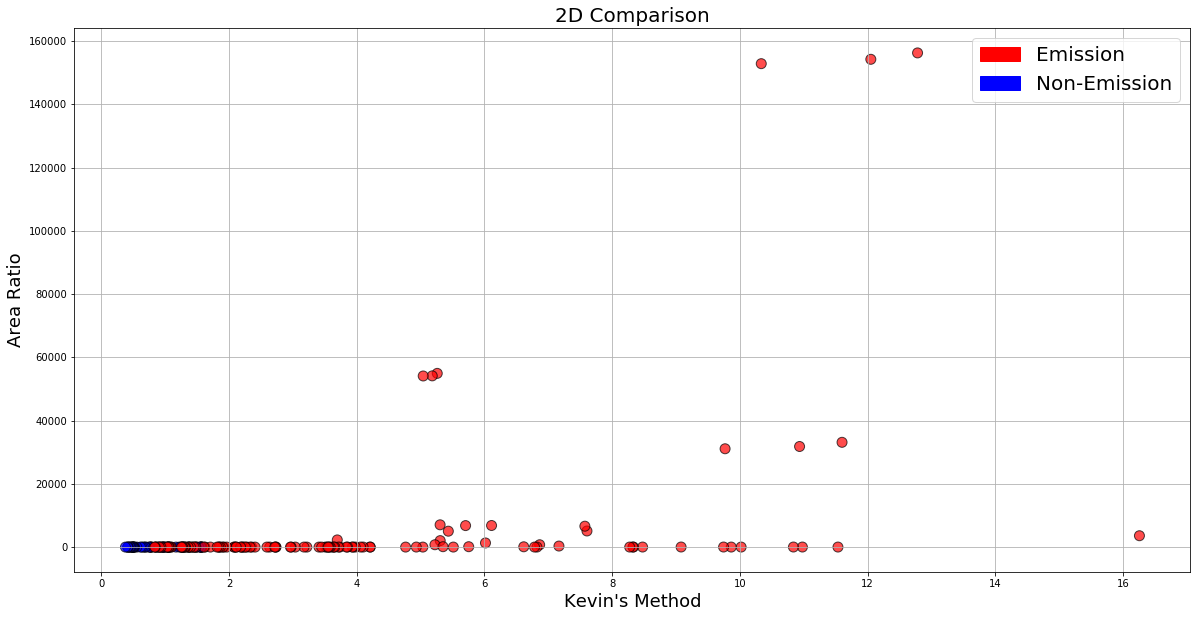

In [119]:
plt.figure(figsize=(20,10))
openfile = pd.read_csv('/Users/ballanr/Desktop/peakstocompare.csv')
kevins = openfile['Confidence1']
areas = openfile['Area Ratios']
emission = openfile['Emission Feature']
use_colours = {'1': 'red', '0': 'blue'}
plt.scatter(kevins,areas,color=[use_colours[str(k)] for k in emission],s=100,edgecolor='black',alpha=0.7);
plt.title('2D Comparison',fontsize=20);
plt.ylabel('Area Ratio',fontsize=18);
plt.xlabel('Kevin\'s Method',fontsize=18);
red_circle = mpatches.Circle((1,1),color='red', label='Emission')
blue_circle = mpatches.Circle((1,1),color='blue', label='Non-Emission')
plt.legend(handles=[red_circle, blue_circle],bbox_to_anchor=(1,1),fontsize=20)
plt.grid(True);

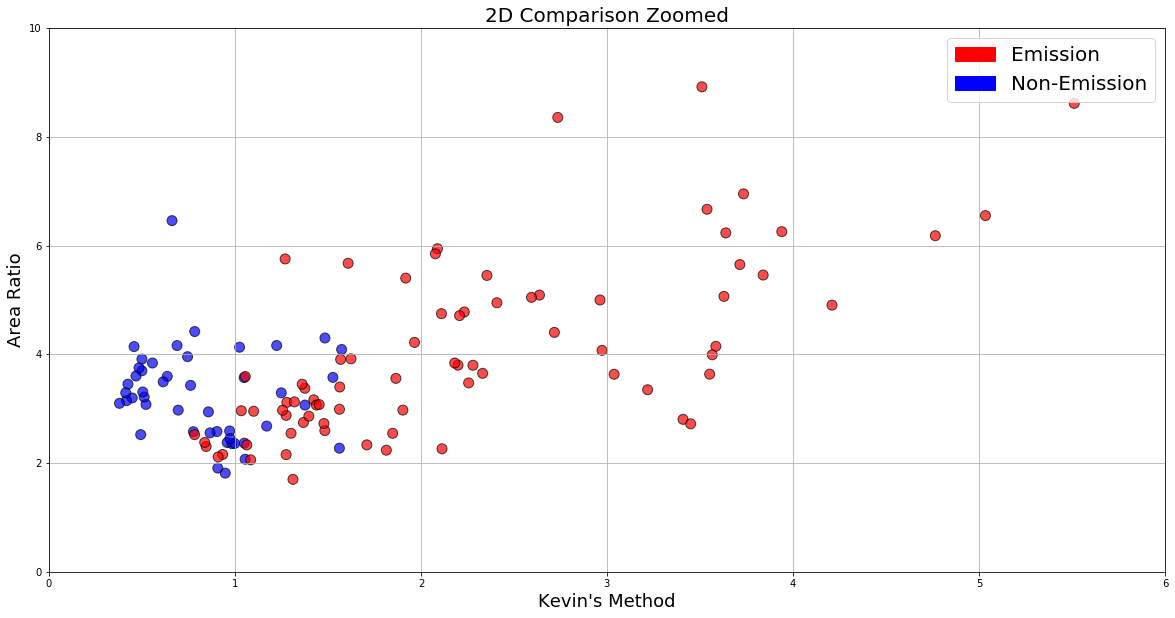

In [122]:
plt.figure(figsize=(20,10))
use_colours = {'1': 'red', '0': 'blue'}
key = {'red': 'Emission', 'blue': 'Noise'}
colors = ['red','blue']
plt.scatter(kevins,areas,color=[use_colours[str(k)] for k in emission],s=100,edgecolor='black',alpha=0.7);
plt.title('2D Comparison Zoomed',fontsize=20);
plt.ylabel('Area Ratio',fontsize=18);
plt.xlabel('Kevin\'s Method',fontsize=18);
plt.ylim(0,10);
plt.xlim(0,6);
red_circle = mpatches.Circle((1,1),color='red', label='Emission')
blue_circle = mpatches.Circle((1,1),color='blue', label='Non-Emission')
plt.legend(handles=[red_circle, blue_circle],bbox_to_anchor=(1,1),fontsize=20)
plt.grid(True);

After plotting these values on the same plot it doesn't seem like the areas method is really helpful at all.